Data Investigation of Titanic Dataset 

Question Posed: 
1. What factor is closely related to high likelihood of survival?
2. What is the average fare? How much is the ticket price of each class supposed to be?
3. What is average age of the crew? What is the oldest and youngest age?
4. In the data, what is the survival rate? What is the number of survivors of each gender?
5. What is the limitation of the data?
6. Which class has the highest number of passengers?
7. What is the sex distribution of the sample data?

In [1]:
# read csv file
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
titanic_data = read_csv('train.csv')


In [2]:
# import numpy and pandas to support the following analysis. 
import numpy as np
import pandas as pd

In [3]:
# read the titanic csv file
titanic_dataset = pd.read_csv('train.csv')

In [4]:
# show the information of the first five passengers
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# cleaning the missing values
titanic_dataset.dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [6]:
# set up corretlation function to calculate relationships between different variables
def correlation(x,y):
    std_x = (x-x.mean())/x.std(ddof=0)
    std_y = (y-y.mean())/y.std(ddof=0)
    
    return (std_x * std_y).mean()

In [7]:
# calculate the correlation between age and survival 
correlation(titanic_dataset['Age'],titanic_dataset['Survived'])

-0.077982678413863221

This correlation is weak and negative

In [8]:
# transform sex into integers(0 for female, 1 for male) for correlation calculation
titanic_dataset['Sex'].replace(['female','male'],[0,1],inplace=True)

In [9]:
# check the updated dataset
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# drop the data we don't use
t_updated = titanic_dataset.drop(titanic_dataset.columns[[0, 3, 8,10,11]], axis=1)
t_updated.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [11]:
# calculate the correlation between sex and survival 
correlation(titanic_dataset['Sex'],titanic_dataset['Survived'])

-0.54335138065775535

This correlation is not strong and negative

In [12]:
# calculate the correlation between Pclass and survival 
correlation(titanic_dataset['Pclass'],titanic_dataset['Survived'])

-0.3384810359610152

This correlation is not strong and negative

In [13]:
# calculate the correlation between sibSp and survival 
correlation(titanic_dataset['SibSp'],titanic_dataset['Survived'])

-0.035322498885735569

This correlation is weak and negative

In [14]:
# calculate the correlation between Parch and survival 
correlation(titanic_dataset['Parch'],titanic_dataset['Survived'])

0.081629407083483485

This correlation is weak and positive

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


Use Regressionplot to visualize relationship between Age and Survival. 

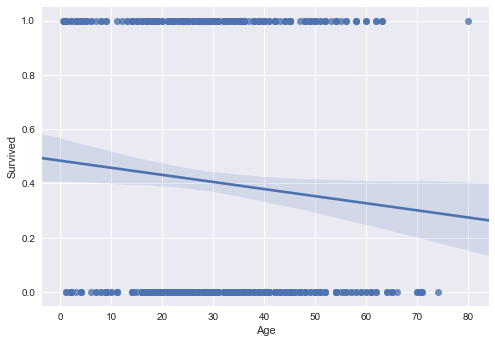

In [16]:
sns.regplot(x="Age", y="Survived", data=titanic_dataset)

We can see the relationship is overall very weak and negative: Survival is prone to decrease as Age increases. 

Use Barplot to visualize relationship between Sex and Survival grouped by Passenger Class. 

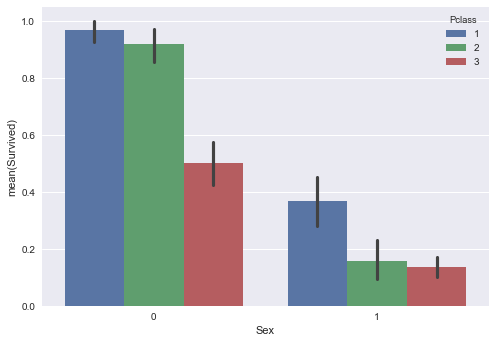

In [17]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_dataset)

We can see that regardless of Plcass, women generally had higher survival rate than men. Moreover, the survival rate of Class 1 is generally higher than that of the other two.Interestingly, the survival seems to increase as Pclass goes in descending order.

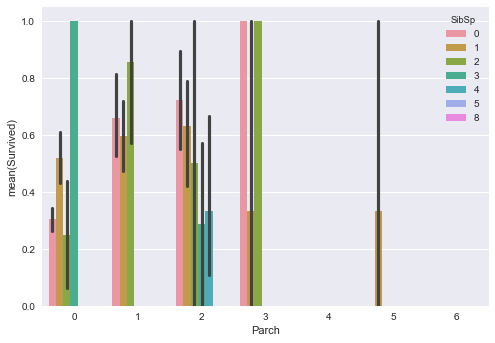

In [18]:
sns.barplot(x="Parch", y="Survived", hue="SibSp", data=titanic_dataset)

We can see three types of passengers have the highest survival rate:1.people with no parents/children on board and 3 siblings/spouses. 2.people with 3 parents/children on board and no siblings/spouses.3. people with 3 parents/children on board and 2 siblings/spouses.

Use Countplot to visualize the distribution of PClass. 

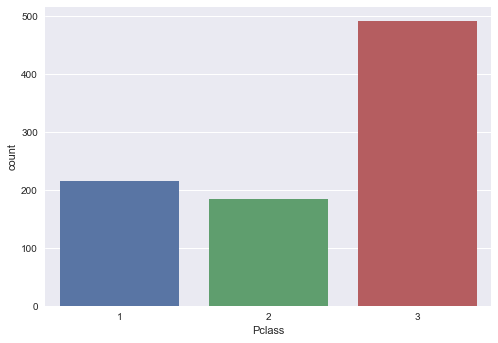

In [19]:
sns.set(style="darkgrid")
class_plot = sns.countplot(x="Pclass", data=titanic_dataset)

We can see that most people(about 500) were in Class 3,and the number of people in Class1 and Class2 are very close to each other.

Use Countplot to visualize the distribution of Sex. 

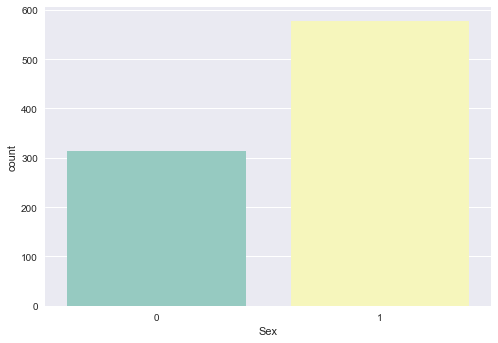

In [20]:
gender_count = sns.countplot(x="Sex", data=titanic_dataset, palette="Set3")

We can see that the number of male is much higher than that of female, roughly twice higher.

In [21]:
# calculate the stats of fare
fare_dataset= titanic_dataset['Fare']
fare_dataset.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Most Fare are between 0-31, while the highest is 512.

In [22]:
# calculate the stats of age
age_dataset= titanic_dataset['Age']
age_dataset.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Most ages range from 0 to 38, while the oldest is 80.

In [23]:
# count the number of people who survive
survival_dataset= titanic_dataset['Survived']
survival_dataset.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [24]:
# count the total number of people who survive
survival_dataset.count() 

891

In [25]:
# calculate survival_rate 
total_num = float(891)
survival = float(342)
survival_rate = survival/total_num * 100
print survival_rate

38.3838383838


In the sample data, the survival rate is 38.38

In [26]:
# create a new df to calculate the number of female and male who survived.
tsex_sur_count = t_updated.drop(t_updated.columns[[1, 3, 4,5,6]], axis=1)
tsex_sur_count = tsex_sur_count[tsex_sur_count.Survived != 0]
tsex_sur_count.head()

,Survived,Sex
1,1,0
2,1,0
3,1,0
8,1,0
9,1,0


In [27]:
pd.value_counts(tsex_sur_count['Sex'].values, sort=False)

0    233
1    109
dtype: int64

There are 233 female and 109 male who survived the shipwreck.

Conclusion: 
1. Correlation between variables: After an examination of correlation between each useful independent variable and survival, we found that all independent variables examined were not highly correlated to survival. One interesting fact is that the correlation between sex and survival is much higher than that between other and survival, which is -0.5433, indicating that women were slightly more likely to survive than men. However, this is only a weak correlation. Moreover, correlation doens't mean causation. From the above analysis, we can hypothesize that survival might be determined by chance. From the Regression plot we can see there is a weak and positive relationship between age and survival.From the Barplot we can see generally women are more likely to survive than men.Also, the survival rate tend to increase as Pclass decrease. However, as we've seen on the correlation calculation section, both relationsips are not strong. Moreover, through the Barplot we find that certain combinations of Sibsp and Parch are linked to higher survival rate. 
2. The average of the fare is 32.2. The highest is 512, and the lowest is 0. We can hypothesize that the price of Class 3 is inbetween 0-14,of Class 2 is inbetween 14-31, and of Class 1 is between 38-80, with variations of price in each class. 
3. The average age of the crew is about 30. The oldest is 80, and the youngest is only 153 days old, which is 0.42 year old. 
4. 891 people survived, only 342 survived the shipwreck. The survival rate is 38.38. There are 233 female and 109 male who survived the shipwreck.
5. This is only a sample of the whole crew data. It might take more data to get a more accurate observation.
6. Class 3 has the highest number of passengers.
7. The number of male is approximately twice bigger than that of female.